![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)


# Intro to Deep Learning with Keras

#### Author: Alexander Fred Ojala

_____

# Why Keras
Modular, powerful and intuitive Deep Learning python library integrated with TensorFlow.
* Minimalist, user-friendly interface
* Works on CPUs and GPUs
* Open-source, developed and maintained by a community of contributors, and
publicly hosted on github
* Extremely well documented, lots of working examples: https://keras.io/
* Very shallow learning curve —> it is by far one of the best tools for experimenting, both for beginners and experts

# Comparison: Deep Learning Framewroks
Compile code down to the deep learning framework (i.e. takes longer to run). See comparison of speed for different DL frameworks:

<img src='imgs/train_times.png' width=600px></img>

In [35]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
import keras

In [37]:
import tensorflow.keras as keras #canonical

# Keras "Hello World" on Iris

### Data preprocessing

In [39]:
from sklearn import datasets

data = datasets.load_iris()

print(data.DESCR[:980])

x = data['data']
y = data['target']

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== =====


In [40]:
# one hot encode y
import pandas as pd

y = pd.get_dummies(y).values
y[:5,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [41]:
# train test split, plus randomize
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.4,
                                                    random_state=1337,
                                                   shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(90, 4)
(90, 3)
(60, 4)


### The Sequential model
The simplest model in Keras is the Sequential model, a linear stack of layers.

* **Sequential model** linear stack of layers: It allows us to build NNs like legos, by adding one layer on top of the other, and swapping layers

* Graph: multi-input, multi-output, with arbitrary connections inside

In [42]:
# Core data structure in Keras is a model
# The model is an object in which we organize layers

In [43]:
# model initialization
from keras.models import Sequential

model = Sequential() # instantiate empty Sequential model

We can import layer classes and stack layers (in an NN model for example), by using `.add()`

# Specifying the input shape

The model needs to know what input shape it should expect. For this reason, the first layer in a  Sequential model needs to receive information about its input shape. There are several possible ways to do this:

* Pass an input_shape argument to the first layer. This is a shape tuple (a tuple of integers or `None` entries, where `None` indicates that any positive integer may be expected).
* Some 2D layers, such as Dense, support the specification of their input shape via the argument  input_dim, and some 3D temporal layers support the arguments `input_dim` and `input_length`.


**The following snippets are strictly equivalent:**
> * `model.add(Dense(32, input_shape=(784,)))`
> * `model.add(Dense(32, input_dim=784))`

# Construction Phase

In [44]:
# model contruction (architecture build computational graph)
from keras.layers import Dense

model.add( Dense(units=64, activation='relu', input_shape=(4,) ))
model.add( Dense(units=3, activation='softmax') )

# Compilation phase, specify learning process

Run `.compile()` on the model to specify learning process.

Before training a model, you need to configure the learning process, which is done via the  compile method. It receives three arguments:

* **A loss function:** This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as `categorical_crossentropy` or `mse`), or it can be an objective function.
* **An optimizer:** This could be the string identifier of an existing optimizer (such as `rmsprop`, `gradientdescent`, or `adagrad`), or an instance of the Optimizer class.
* **(Optional) A list of metrics:** For any classification problem you will want to set this to `metrics=['accuracy']`. A metric could be the string identifier of an existing metric or a custom metric function.

In [45]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

## We can also specify our own optimizer, loss function or metric (or code it ourselves)

```python
# or with we can specify loss function

from keras.optimizers import SGD

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(lr=0.001, momentum = 0.9, nesterov=True),
             metrics = ['accuracy'])
```

### Different optimizers and their trade-offs
To read more about gradient descent optimizers, hyperparameters etc. This is a recommended reading: http://ruder.io/optimizing-gradient-descent/index.html

### Training
Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function.

In [46]:
# Fit the model by iterating over the training data in batches

model.fit(X_train, y_train, epochs = 50, batch_size= 32)

Epoch 1/50
3/3 [==============================] - 0s 817us/step - loss: 1.2910 - accuracy: 0.2667
Epoch 2/50
3/3 [==============================] - 0s 796us/step - loss: 1.1115 - accuracy: 0.2667
Epoch 3/50
3/3 [==============================] - 0s 865us/step - loss: 0.9926 - accuracy: 0.4667
Epoch 4/50
3/3 [==============================] - 0s 1ms/step - loss: 0.9149 - accuracy: 0.6556
Epoch 5/50
3/3 [==============================] - 0s 889us/step - loss: 0.8675 - accuracy: 0.6778
Epoch 6/50
3/3 [==============================] - 0s 902us/step - loss: 0.8386 - accuracy: 0.6889
Epoch 7/50
3/3 [==============================] - 0s 904us/step - loss: 0.8185 - accuracy: 0.7333
Epoch 8/50
3/3 [==============================] - 0s 862us/step - loss: 0.8040 - accuracy: 0.7778
Epoch 9/50
3/3 [==============================] - 0s 914us/step - loss: 0.7871 - accuracy: 0.7667
Epoch 10/50
3/3 [==============================] - 0s 904us/step - loss: 0.7713 - accuracy: 0.7889
Epoch 11/50
3/3 [====

In [47]:
# # Evaluate the model Accuracy on test set
model.evaluate(X_test, y_test, batch_size=60,verbose=False)[1]

0.949999988079071

In [48]:
# Predictions on new data:

class_probabilities = model.predict(X_test, batch_size=128)

# gives output of the softmax function

1/1 [==============================] - 0s 23ms/step


In [49]:
class_probabilities[:5,:]

array([[0.08295717, 0.50333226, 0.4137106 ],
       [0.8463311 , 0.12937741, 0.02429152],
       [0.01562279, 0.39225733, 0.5921199 ],
       [0.7804558 , 0.17249876, 0.04704535],
       [0.01024022, 0.39894164, 0.5908181 ]], dtype=float32)

---------
---------
# End here
---------
---------

# Keras DNN on MNIST

Data preprocessing

In [50]:
# Load MNIST data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_dim = 28*28
num_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_dim)
X_test = X_test.reshape(X_test.shape[0], img_dim)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [51]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [52]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
# Sequential model to stack layers

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Model contruction

In [54]:
# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(300, activation=tf.nn.leaky_relu, input_shape=(784,) ) )
model.add(Dropout(.1))

# Second..
model.add(Dense(200, activation=tf.nn.leaky_relu))
model.add(Dropout(.1))

# Third..
model.add(Dense(100, activation=tf.nn.leaky_relu))
model.add(Dropout(.1))

model.add(Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 200)               60200     
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [56]:
# For a multi-class classification problem
model.compile(optimizer='adam', #chooses suitable learning rate for you.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# train model
history = model.fit(X_train, y_train, epochs=3, batch_size=128,
                   verbose=True)

Epoch 1/3
469/469 [==============================] - 2s 4ms/step - loss: 0.2919 - accuracy: 0.9121
Epoch 2/3
469/469 [==============================] - 2s 4ms/step - loss: 0.1283 - accuracy: 0.9604
Epoch 3/3
469/469 [==============================] - 2s 4ms/step - loss: 0.0945 - accuracy: 0.9705


In [58]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08865893632173538
Test accuracy: 0.9722999930381775


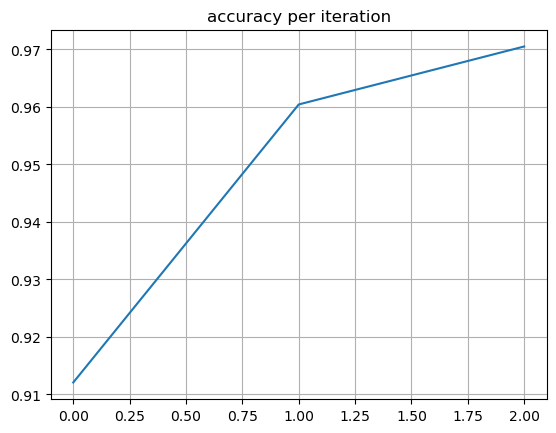

In [59]:
plt.plot(range(3),history.history['accuracy'])
plt.title('accuracy per iteration')
plt.grid();

In [60]:
# Great accuracy for an ANN in so few training steps

# CNN in Keras
## 99.5% accuracy on MNIST in 12 epochs

Note this takes ~1hr to run on a CPU

### 1. Data preprocessing

In [61]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# notice that we don't flatten image
input_shape = (img_rows, img_cols, 1)

#normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Model construction

In [62]:
# Almost LeNet architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               1179776   
                                                      

# Model compilation

In [63]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

# Model training

In [64]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 22s 47ms/step - loss: 0.2371 - accuracy: 0.9276 - val_loss: 0.0501 - val_accuracy: 0.9849
Epoch 2/12
469/469 [==============================] - 22s 46ms/step - loss: 0.0829 - accuracy: 0.9761 - val_loss: 0.0399 - val_accuracy: 0.9875
Epoch 3/12
469/469 [==============================] - 22s 46ms/step - loss: 0.0621 - accuracy: 0.9814 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 4/12
469/469 [==============================] - 22s 46ms/step - loss: 0.0504 - accuracy: 0.9842 - val_loss: 0.0327 - val_accuracy: 0.9892
Epoch 5/12
469/469 [==============================] - 22s 46ms/step - loss: 0.0437 - accuracy: 0.9857 - val_loss: 0.0286 - val_accuracy: 0.9906
Epoch 6/12
469/469 [==============================] - 22s 46ms/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.0294 - val_accuracy: 0.9912
Epoch 7/12
469/469 [==============================] - 22s 46ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0259 - val_accuracy:

# Model evaluation

In [65]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02705719880759716
Test accuracy: 0.992900013923645


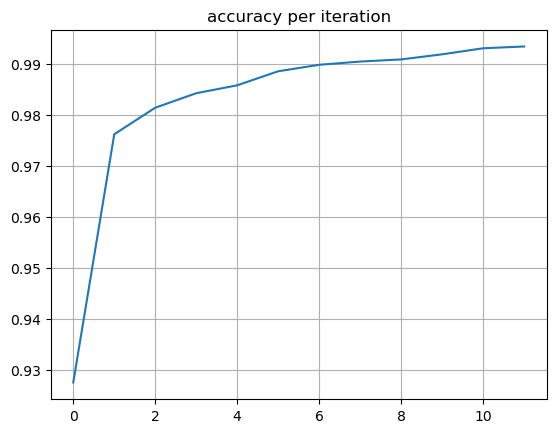

In [66]:
plt.plot(range(12),history.history['accuracy'])
plt.title('accuracy per iteration')
plt.grid();